# Airbnb Seattle Data Exploration and Analysis
## Introduction

- **Motivation**: The purpose of this analysis is to explore and understand the factors that influence Airbnb listing prices. By analyzing the dataset, we aim to uncover trends, patterns, and relationships between various features (e.g., property type, number of bedrooms, amenities) and the price of listings. This analysis will help identify key drivers of price variation, provide insights for hosts to optimize their pricing strategies, and offer a better understanding of the Airbnb market dynamics.
- **Data Source**: The dataset used in this analysis was obtained from [Airbnb's publicly available data](https://www.kaggle.com/datasets/airbnb/seattle/data). It contains detailed information about Airbnb listings, including features such as property type, number of bedrooms, amenities, host acceptance rates, and pricing details. The dataset spans listings from Seattle over a limited time period (January 2016 - January 2017). Each row represents a unique listing, and the columns provide various attributes and metrics associated with that listing.

All analysis was undertaken using Python v. 3.11.2.

# Business Understanding #

The goal of this analysis is to employ Airbnb data to gain insights into pricing trends, demand patterns, and the factors influencing listing prices. Specifically, we aim to address the following key questions:

1. **Property Type Price Differences**: Are some property types, on average, more expensive than others?
2. **Monthly Trends in Prices**: Are some months, on average, more expensive than others?
3. **Determinants of Price**: What are the most important determinants of price? Which features (e.g., property type, amenities, location) are most strongly associated with higher or lower prices?

By answering these questions, this analysis will provide insights for hosts to optimize their pricing strategies and for potential guests to better understand the Airbnb market dynamics.

## Importing Libraries and Data
### Loading libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import math
import re
from matplotlib.colors import LinearSegmentedColormap
import scikit_posthocs as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import mannwhitneyu, kruskal, t, ttest_1samp
from sklearn.discriminant_analysis import StandardScaler
import os
import openpyxl
from openpyxl import load_workbook
from openpyxl.utils import get_column_letter
from openpyxl.styles import Font

# Ensure plots are displayed inline
%matplotlib inline

# Set global plot style
sns.set_theme(style="whitegrid")

### Importing Data
1. Importing calendar data

In [2]:
# Calendar, including listing id and the price and availability for that day
calendar_df = pd.read_csv('data/calendar.csv')
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


2. Importing listings data

In [3]:
# Listings, including full descriptions and average review score
listings_df = pd.read_csv('data/listings.csv')
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


## Data Cleaning

In [4]:
# Merge listings and calendar dataframes
merged_list_calendar_df = pd.merge(listings_df, calendar_df, left_on='id', right_on='listing_id')
merged_list_calendar_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,date,available,price_y
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,241032,2016-01-04,t,$85.00
1,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,241032,2016-01-05,t,$85.00
2,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,241032,2016-01-06,f,NaN
3,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,241032,2016-01-07,f,NaN
4,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,241032,2016-01-08,f,NaN


In [5]:
# Remove non-numeric characters from the price columns (e.g. $, commas) and convert to numeric
merged_list_calendar_df['price_y'] = merged_list_calendar_df['price_y'].replace(r'[\$,]', '', regex=True).astype(float)

# Drop price_x column and rename price_y to price
merged_list_calendar_df.drop(columns='price_x', inplace=True)
merged_list_calendar_df.rename(columns={'price_y': 'price'}, inplace=True)

# Extract month and year from the 'date' column
merged_list_calendar_df['date'] = pd.to_datetime(merged_list_calendar_df['date'])
merged_list_calendar_df['month'] = merged_list_calendar_df['date'].dt.month
merged_list_calendar_df['year'] = merged_list_calendar_df['date'].dt.year

Check for missing values on price.

In [6]:
# Check missing values
na_counts = merged_list_calendar_df[['date', 'price']].isna().sum()
print(na_counts)

date          0
price    459028
dtype: int64


In [7]:
# Check the distribution of missing values
merged_list_calendar_df['price_missing'] = merged_list_calendar_df['price'].isna()

# Create contingency table
contingency_table = pd.crosstab(merged_list_calendar_df['price_missing'], merged_list_calendar_df['available'])
print(contingency_table)

available           f       t
price_missing                
False               0  934542
True           459028       0


It appears that days where the property was unavailable, there is no listing price. We can impute values the missing values by substituting for the mean or median listing price for that month by listing ID. First, check distribution of prices:

<Axes: xlabel='price', ylabel='Count'>

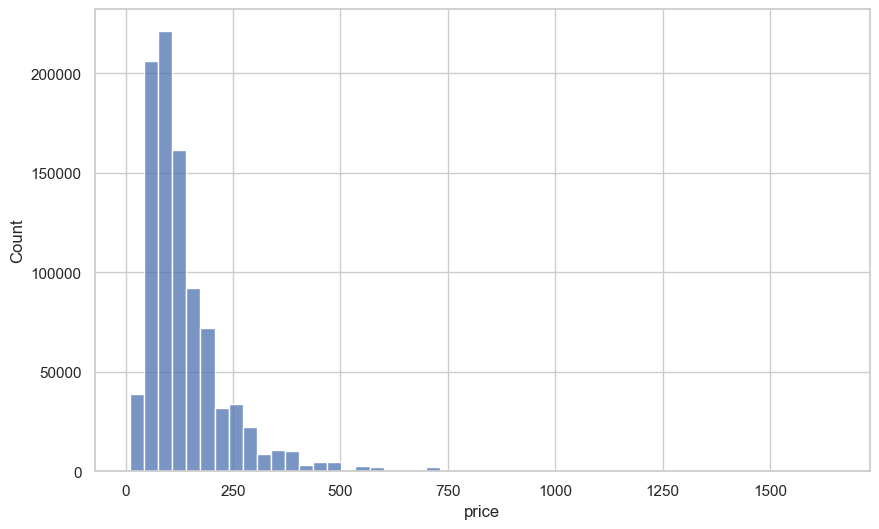

In [8]:
# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(merged_list_calendar_df['price'], bins=50)

Prices are highly skewed. In such cases, the median will be a better measure of central tendency as it is less sensitive to outliers.

### Impute missing values using median price per listing_id by month

In [9]:
# Convert the date column to datetime
merged_list_calendar_df['date'] = pd.to_datetime(merged_list_calendar_df['date'])

# Extract year and month from the date column
merged_list_calendar_df['year'] = merged_list_calendar_df['date'].dt.year
merged_list_calendar_df['month'] = merged_list_calendar_df['date'].dt.month

# Calculate the average price for each combination of listing_id, year, and month
listing_stats = merged_list_calendar_df.groupby(['listing_id', 'year', 'month'])['price'].agg(['median', 'mean']).reset_index()
listing_stats.rename(columns={'median': 'median_price', 'mean': 'mean_price'}, inplace=True)

# Merge the mean and median prices back into the original DataFrame
merged_list_calendar_df = pd.merge(merged_list_calendar_df, listing_stats, on=['listing_id', 'year', 'month'], how='left')

In [10]:
# Fill missing values with corresponding median price and then drop rows with empty slices
merged_list_calendar_df.update(merged_list_calendar_df['price'].fillna(merged_list_calendar_df['median_price']))

# Drop rows with remaining NaN values in price
merged_list_calendar_df.dropna(subset=['price'], inplace=True)

Restricting ourselves to 2016 only for further analysis, given 2017 only has data for January.

In [11]:
merged_list_calendar_df = merged_list_calendar_df[merged_list_calendar_df['year'] == 2016]

# Visualization
## Overall distribution of prices

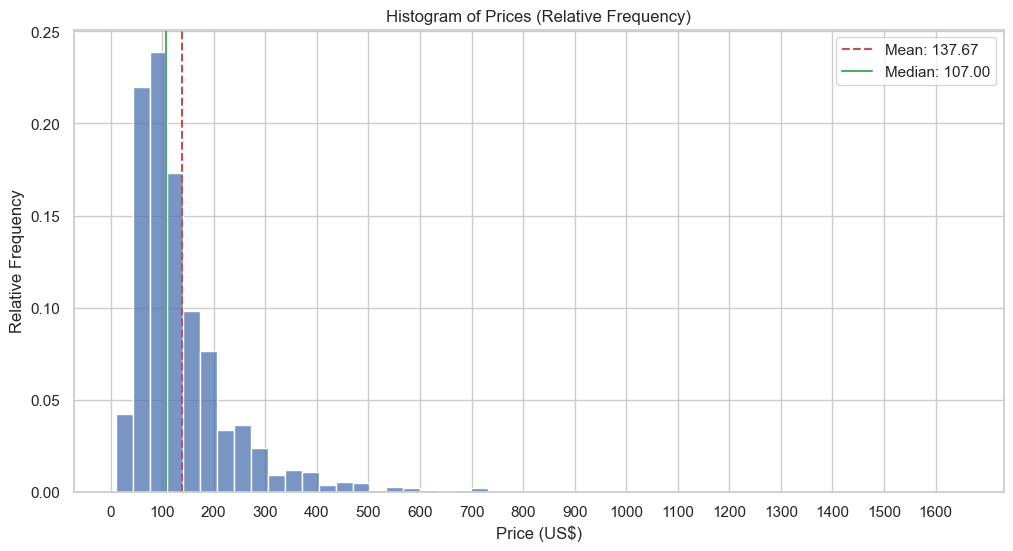

In [12]:
# Calculate mean and median
mean_price = merged_list_calendar_df['price'].mean()
median_price = merged_list_calendar_df['price'].median()

# Plot histogram of prices with relative frequency
plt.figure(figsize=(12, 6))
sns.histplot(merged_list_calendar_df['price'], bins=50, kde=False, stat='probability')

# Plot mean and median lines
plt.axvline(mean_price, color='r', linestyle='--', label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='g', linestyle='-', label=f'Median: {median_price:.2f}')

# Add labels, title, and grid
plt.xlabel('Price (US$)')
plt.ylabel('Relative Frequency')
plt.title('Histogram of Prices (Relative Frequency)')
plt.grid(True)

# Use a lambda function to round up to the nearest 100
round_up_to_nearest_100 = lambda number: math.ceil(number / 100) * 100
plt.xticks(np.arange(0, round_up_to_nearest_100(max(merged_list_calendar_df['price'])), 100))

# Add legend and show plot
plt.legend()
plt.show()

# Differences in Prices by Property Type
Are some property types more expensive than others? 

## Group and Compare Mean Prices by Property Type

In [13]:
# Drop missing values in property_type
merged_list_calendar_df = merged_list_calendar_df.dropna(subset=['property_type'])
merged_list_calendar_df['property_type'].isna().sum()

np.int64(0)

In [14]:
# Group by property type and calculate summary statistics
stats_per_property = merged_list_calendar_df.groupby(['property_type']).agg({
    'price': ['mean', 'median', 'min', 'max', 'std']
}).reset_index()

# Rename columns for better readability
stats_per_property.columns = ['Property Type', 'Mean Price', 'Median Price', 'Min Price', 'Max Price', 'Std Dev Price']

stats_per_property

# Calculate overall summary statistics for all property types
overall_stats = merged_list_calendar_df['price'].agg(['mean', 'median', 'min', 'max', 'std']).to_frame().T.reset_index(drop=True)
overall_stats['Property Type'] = 'All Properties'

# Reorder columns to move 'Property Type' to the first position
overall_stats = overall_stats[['Property Type', 'mean', 'median', 'min', 'max', 'std']]
overall_stats.columns = ['Property Type', 'Mean Price', 'Median Price', 'Min Price', 'Max Price', 'Std Dev Price']

# Concatenate the overall summary statistics with the statistics per property type
stats_per_property = pd.concat([overall_stats, stats_per_property], ignore_index=True)


In [15]:
# Move "All Properties" to the top and sort the rest by median price
all_properties_row = stats_per_property[stats_per_property['Property Type'] == 'All Properties']
other_properties = stats_per_property[stats_per_property['Property Type'] != 'All Properties']
other_properties_sorted = other_properties.sort_values(by='Median Price', ascending=False)

# Concatenate the "All Properties" row with the sorted other properties
final_stats_per_property = pd.concat([all_properties_row, other_properties_sorted], ignore_index=True)

# Round the prices to two decimal places
final_stats_per_property = final_stats_per_property.round(2)

# Display the neatly formatted table
print(final_stats_per_property)

# Export the table to a Markdown format
markdown_table = final_stats_per_property.to_markdown(index=False)
print("\nMarkdown Table:\n")
print(markdown_table)

# Export the table to an HTML format and save it to the 'output' folder
output_path = 'output/final_stats_per_property.html'
final_stats_per_property.to_html(output_path, index=False)

      Property Type  Mean Price  Median Price  Min Price  Max Price  \
0    All Properties      137.67         107.0       10.0     1650.0   
1              Boat      328.83         150.0       75.0      775.0   
2       Condominium      167.62         140.0       41.0      800.0   
3         Apartment      137.86         119.0       12.0      939.0   
4              Loft      134.14         100.0       25.0      450.0   
5              Yurt      105.36         100.0      100.0      120.0   
6             Cabin      114.51          99.0       40.0      350.0   
7         Camper/RV      126.12          99.0       42.0      375.0   
8   Bed & Breakfast      115.08          95.0       26.0      420.0   
9             House      137.58          95.0       10.0     1650.0   
10         Bungalow      122.97          95.0       53.0      500.0   
11        Townhouse      131.14          90.0       28.0      788.0   
12            Other      105.39          88.0       35.0      272.0   
13    

### Visualization
Create violin plot to visualize spread and distribution of listed prices by property type.

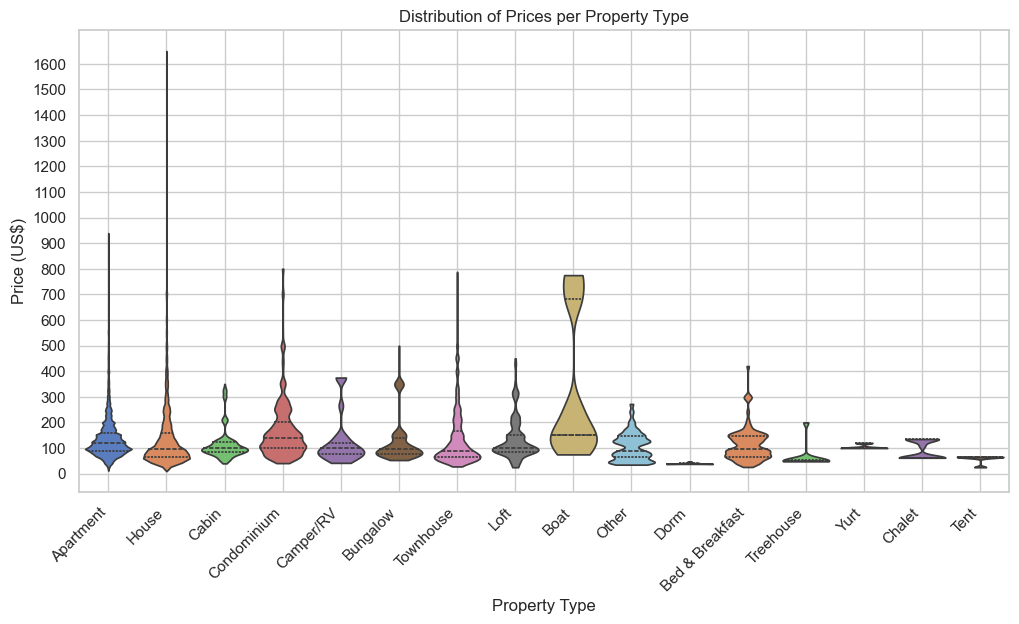

In [16]:
# Create a violin plot for prices per property type
plt.figure(figsize=(12, 6))
# sns.boxplot(x='property_type', y='price_y', data=property_type, palette='muted', hue='property_type')
sns.violinplot(x='property_type', y='price', data=merged_list_calendar_df, inner='quartile', palette='muted', hue='property_type', native_scale=True, cut = 0)

plt.xlabel('Property Type')
plt.ylabel('Price (US$)')
plt.title('Distribution of Prices per Property Type')
plt.grid(True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(ticks=np.arange(0, max(merged_list_calendar_df['price']) + 50, 100))

plt.show()

### Statistical tests
Perform statistical tests. To determine if the differences in prices between property types are statistically significant, we use the Kruskal-Wallis H-test.

Assumptions:
1. Dependent variable (price) is ordinal or continous. Continuous.
2. Independent variable consists of 2 or more categorical, independent groups. Yes.
3. Independence of observations. Yes.
4. Distributions in each group have same shape (including the same variability): Check below.

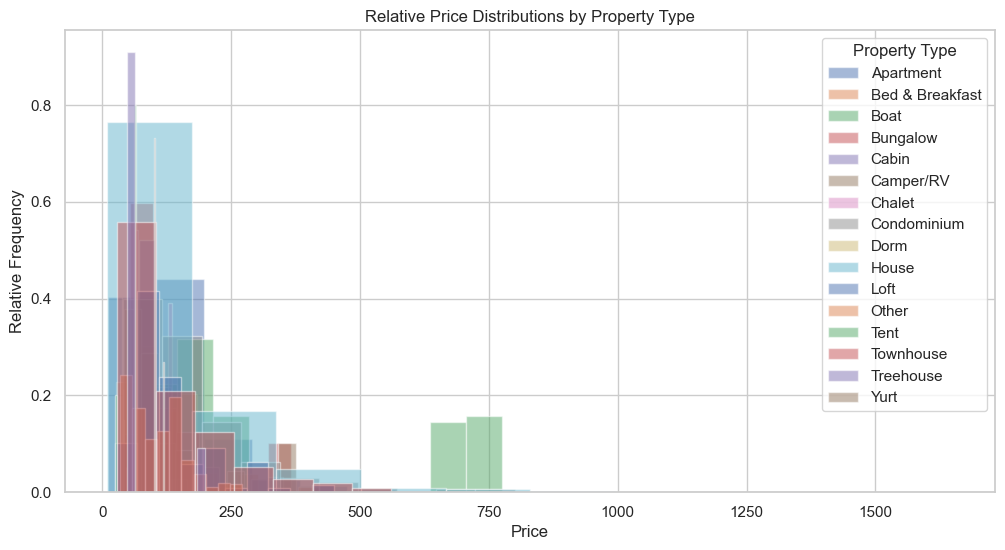

In [17]:
# Group prices by property type
grouped_data = merged_list_calendar_df[['property_type', 'price']].dropna()

# Plot histograms for each property type with relative frequencies
plt.figure(figsize=(12, 6))

for property_type, group in grouped_data.groupby('property_type'):
    # Calculate histogram data
    counts, bins = np.histogram(group['price'], bins=10)
    relative_freq = counts / counts.sum()  # Normalize to relative frequency
    
    # Plot the histogram as a step-filled plot
    plt.hist(bins[:-1], bins, weights=relative_freq, alpha=0.5, label=property_type)

# Add labels, title, and legend
plt.title('Relative Price Distributions by Property Type')
plt.xlabel('Price')
plt.ylabel('Relative Frequency')
plt.legend(title='Property Type')
plt.show()

Some differences in the shape of the distributions. Thus, Kruskall-Wallis H-test can be used to compare mean ranks (and not medians).

In [18]:
# Group prices by property type
grouped_prices = [group['price'].dropna() for _, group in merged_list_calendar_df.groupby('property_type')]

# Perform the Kruskal-Wallis H-test
stat, p_value = kruskal(*grouped_prices)
print(f"Kruskal-Wallis H-test statistic: {stat:.3f}, p-value: {p_value:.3f}")

Kruskal-Wallis H-test statistic: 32391.950, p-value: 0.000


Kruskal-Wallis H-test finds significant difference (p-value < 0.001>) indicating that mean rank of price differs among property types.

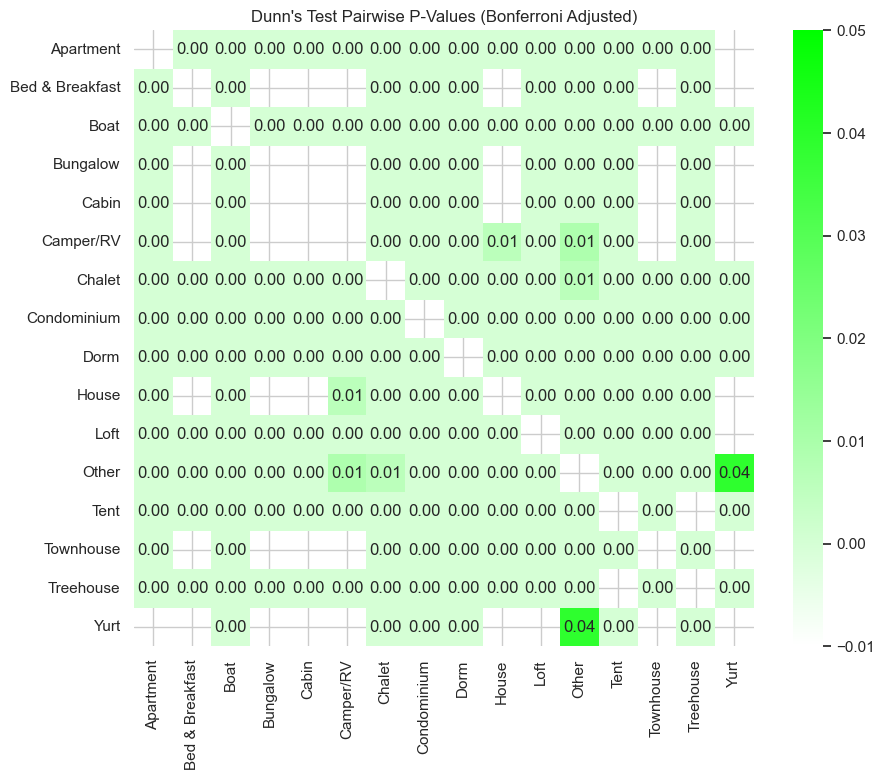

In [19]:
# Perform Dunn's test with Bonferroni correction
dunn_results = sp.posthoc_dunn(
    grouped_data, 
    val_col='price',  # Column with the values to compare
    group_col='property_type',  # Column with the group labels
    p_adjust='bonferroni'  # Adjust p-values for multiple comparisons
)

# Format the Dunn's test results to 3 significant digits
dunn_results = dunn_results.map(lambda x: round(x, 3))

# Create a custom colormap: white for p-values >= 0.05, green for p-values < 0.05
colors = [(1, 1, 1), (0, 1, 0)]  # White to green
cmap = LinearSegmentedColormap.from_list("white_to_green", colors)

# Create a mask for p-values >= 0.05
mask = dunn_results >= 0.05

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    dunn_results,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    mask=mask,  # Mask non-significant values
    cbar=True,  # Show color bar for significant values
    vmin=-0.01, vmax=0.05  # Set value range for colormap
)
plt.title("Dunn's Test Pairwise P-Values (Bonferroni Adjusted)")
plt.show()

### What the Heatmap Shows:
- Each cell in the heatmap corresponds to a pairwise comparison between two property types.
- If a cell is green, it indicates that the two property types have significantly different mean ranks for `price` (based on the adjusted p-value).
- If a cell is white, it means there is no statistically significant difference between the two property types for `price`.

# Monthly Trends in Prices
Are some months on average more priciers than others? 

## Group and Compare Mean Prices by Month

In [20]:
# Calculate the yearly mean price
yearly_mean_price = merged_list_calendar_df.groupby(['year']).agg({
    'price': ['mean', 'median', 'min', 'max', 'std']
}).reset_index()

# Flatten the MultiIndex columns for yearly stats
yearly_mean_price.columns = ['Year', 'Mean Price', 'Median Price', 'Min Price', 'Max Price', 'Std Dev Price']

# Group by year and month, then calculate the mean, median, min, max, and standard deviation for price
stats_per_month = merged_list_calendar_df.groupby(['year', 'month']).agg({
    'price': ['mean', 'median', 'min', 'max', 'std']
}).reset_index()

# Flatten the MultiIndex columns for monthly stats
stats_per_month.columns = ['Year', 'Month', 'Mean Price', 'Median Price', 'Min Price', 'Max Price', 'Std Dev Price']

# Replace month numbers with month names
stats_per_month['Month'] = stats_per_month['Month'].apply(lambda x: calendar.month_name[x])

# Add a "Period" column for monthly stats
stats_per_month['Period'] = stats_per_month['Month']

# Add a "Period" column for yearly stats
yearly_mean_price['Period'] = '2016'

# Select only 2016 data for monthly stats
stats_per_month = stats_per_month[stats_per_month['Year'] == 2016]

# Combine yearly and monthly stats into a single DataFrame
combined_stats = pd.concat([yearly_mean_price, stats_per_month], ignore_index=True)

# Melt the DataFrame to reshape it so that stats are in a single column
combined_stats = combined_stats.melt(
    id_vars=['Year', 'Period'], 
    value_vars=['Mean Price', 'Median Price', 'Min Price', 'Max Price', 'Std Dev Price'],
    var_name='Statistic',
    value_name='Value'
)

# Round the values to 2 decimal places
combined_stats['Value'] = combined_stats['Value'].round(2)

# Convert to wide format
combined_stats = combined_stats.pivot(index=['Year', 'Period'], columns='Statistic', values='Value').reset_index()

# Ensure Period column is ordered with 2016 at the top and months in order
combined_stats['Period'] = pd.Categorical(
    combined_stats['Period'], 
    categories=['2016'] + list(calendar.month_name[1:]),  # '2016' followed by month names
    ordered=True
)

# Sort the DataFrame by Year and Period
combined_stats = combined_stats.sort_values(by=['Year', 'Period']).reset_index(drop=True)

# Move 'Mean Price' and 'Median Price' to the second and third columns
columns_order = ['Year', 'Period', 'Mean Price', 'Median Price', 'Min Price', 'Max Price', 'Std Dev Price']
combined_stats = combined_stats[columns_order]

# Export the table to a Markdown format
markdown_table = combined_stats.to_markdown(index=False)
print("\nMarkdown Table:\n")
print(markdown_table)

# Export the table to an HTML format and save it to the 'output' folder
output_path = 'output/stats_per_period.html'
combined_stats.to_html(output_path, index=False)


Markdown Table:

|   Year | Period    |   Mean Price |   Median Price |   Min Price |   Max Price |   Std Dev Price |
|-------:|:----------|-------------:|---------------:|------------:|------------:|----------------:|
|   2016 | 2016      |       137.67 |            107 |          10 |        1650 |          104.86 |
|   2016 | January   |       118.58 |             99 |          12 |        1000 |           85.76 |
|   2016 | February  |       123.7  |            100 |          20 |        1000 |           91.69 |
|   2016 | March     |       128.42 |            100 |          20 |        1099 |           93.43 |
|   2016 | April     |       132.98 |            109 |          20 |        1099 |           96.01 |
|   2016 | May       |       140.58 |            110 |          20 |        1099 |          103.16 |
|   2016 | June      |       149.92 |            115 |          20 |        1099 |          115.51 |
|   2016 | July      |       154.33 |            115 |          20 |     

## Visualization

In [21]:
# Get yearly mean price for 2016
year_mean = yearly_mean_price['Mean Price'].loc[yearly_mean_price['Year'] == 2016].values[0].round(2)

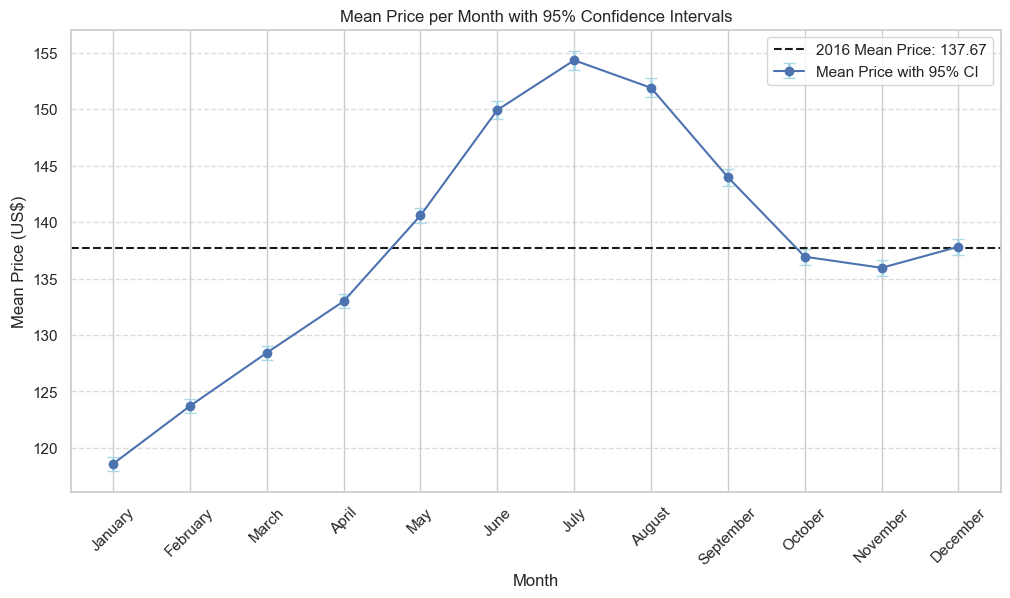

In [22]:
# Group by month and calculate mean, standard deviation, and count
monthly_stats = merged_list_calendar_df.groupby('month')['price'].agg(['mean', 'std', 'count']).reset_index()

# Calculate t-critical value for 95% CI
monthly_stats['t_critical'] = monthly_stats['count'].apply(lambda n: t.ppf(0.975, df=n-1))

# Calculate 95% confidence intervals using t-critical value
monthly_stats['ci'] = monthly_stats['t_critical'] * (monthly_stats['std'] / np.sqrt(monthly_stats['count']))


# Replace month numbers with month names for better readability
monthly_stats['month_name'] = monthly_stats['month'].apply(lambda x: calendar.month_name[x])

# Plot the mean and 95% CI
plt.figure(figsize=(12, 6))
plt.errorbar(
    monthly_stats['month_name'], 
    monthly_stats['mean'], 
    yerr=monthly_stats['ci'], 
    fmt='o-', 
    color='b', 
    ecolor='lightblue', 
    elinewidth=2, 
    capsize=4, 
    label='Mean Price with 95% CI'
)

# Add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('Mean Price (US$)')
plt.title('Mean Price per Month with 95% Confidence Intervals')
# Add horizontal line for yearly mean price
plt.axhline(y=year_mean, color='k', linestyle='--', label=f'2016 Mean Price: {year_mean}')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Statistical Tests


In [23]:
# Perform one-sample t-test for each month and store results in a list
results = []
num_tests = len(merged_list_calendar_df['month'].unique())
adjusted_alpha = 0.05 / num_tests

for month in merged_list_calendar_df['month'].unique():
    # Extract prices for the current month
    monthly_prices = merged_list_calendar_df[merged_list_calendar_df['month'] == month]['price']
    
    # Perform one-sample one-sided t-test
    t_stat, p_value = ttest_1samp(monthly_prices, year_mean, alternative='greater')
    
    # Adjust p-value for Bonferroni correction and cap at 1
    adjusted_p_value = min(p_value * num_tests, 1.0)
    
    # Append results to the list
    results.append({
        'Month': calendar.month_name[month],
        't-statistic': round(t_stat, 2),
        'p-value': round(p_value, 4),
        'adjusted p-value': round(adjusted_p_value, 4),
        'Result': 'Statistically significant greater difference from yearly mean price' if adjusted_p_value < 0.05 else 'No statistically significant greater difference from yearly mean price'
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Export the table to a Markdown format
markdown_table = results_df.to_markdown(index=False)
print("\nMarkdown Table:\n")
print(markdown_table)

# Export the table to an HTML format and save it to the 'output' folder
output_path = 'output/t_test_results_with_bonferroni.html'
results_df.to_html(output_path, index=False)


Markdown Table:

| Month     |   t-statistic |   p-value |   adjusted p-value | Result                                                                 |
|:----------|--------------:|----------:|-------------------:|:-----------------------------------------------------------------------|
| January   |        -63.07 |    1      |                  1 | No statistically significant greater difference from yearly mean price |
| February  |        -44.13 |    1      |                  1 | No statistically significant greater difference from yearly mean price |
| March     |        -29.94 |    1      |                  1 | No statistically significant greater difference from yearly mean price |
| April     |        -14.64 |    1      |                  1 | No statistically significant greater difference from yearly mean price |
| May       |          8.18 |    0      |                  0 | Statistically significant greater difference from yearly mean price    |
| June      |         30.3  | 

In [24]:
# Perform one-sample t-test for each month and store results in a list
results = []
num_tests = len(merged_list_calendar_df['month'].unique())
adjusted_alpha = 0.05 / num_tests

for month in merged_list_calendar_df['month'].unique():
    # Extract prices for the current month
    monthly_prices = merged_list_calendar_df[merged_list_calendar_df['month'] == month]['price']
    
    # Perform one-sample one-sided t-test
    t_stat, p_value = ttest_1samp(monthly_prices, year_mean, alternative='less')
    
    # Adjust p-value for Bonferroni correction and cap at 1
    adjusted_p_value = min(p_value * num_tests, 1.0)
    
    # Append results to the list
    results.append({
        'Month': calendar.month_name[month],
        't-statistic': round(t_stat, 2),
        'p-value': round(p_value, 4),
        'adjusted p-value': round(adjusted_p_value, 4),
        'Result': 'Statistically significant greater difference from yearly mean price' if adjusted_p_value < 0.05 else 'No statistically significant greater difference from yearly mean price'
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

        Month  t-statistic  p-value  adjusted p-value  \
0     January       -63.07   0.0000            0.0000   
1    February       -44.13   0.0000            0.0000   
2       March       -29.94   0.0000            0.0000   
3       April       -14.64   0.0000            0.0000   
4         May         8.18   1.0000            1.0000   
5        June        30.30   1.0000            1.0000   
6        July        38.14   1.0000            1.0000   
7      August        33.61   1.0000            1.0000   
8   September        16.26   1.0000            1.0000   
9     October        -2.05   0.0204            0.2443   
10   November        -4.76   0.0000            0.0000   
11   December         0.41   0.6602            1.0000   

                                               Result  
0   Statistically significant greater difference f...  
1   Statistically significant greater difference f...  
2   Statistically significant greater difference f...  
3   Statistically significant grea

# Determinants of Price

## Control for Common Characteristics

In [25]:
# Function to clean each amenity (remove extra whitespace and quotes)
def clean_amenity(amenity):
    return re.sub(r'^[\'"\{\}\s]+|[\'"\{\}\s]+$', '', amenity).strip()

# Split the 'amenities' column by commas, clean each amenity, and strip any extra whitespace
merged_list_calendar_df['amenities'] = merged_list_calendar_df['amenities'].apply(
    lambda x: [clean_amenity(amenity) for amenity in x.split(',')]
)

# Create a set of all unique amenities across listed properties, excluding empty strings
all_amenities = set(
    amenity for sublist in merged_list_calendar_df['amenities'] for amenity in sublist if amenity.strip()
)

In [26]:
# Count the number of unique amenities for each listing_id
merged_list_calendar_df['unique_amenities_count'] = merged_list_calendar_df['amenities'].apply(lambda x: len(set(x)))

# Verify the new column
print(merged_list_calendar_df[['listing_id', 'unique_amenities_count']].head())

   listing_id  unique_amenities_count
0      241032                      10
1      241032                      10
2      241032                      10
3      241032                      10
4      241032                      10


In [27]:
# Create new columns for each unique amenity to be used in the regression model
for amenity in all_amenities:
    merged_list_calendar_df[amenity] = merged_list_calendar_df['amenities'].apply(lambda x: 1 if amenity in x else 0)

# Drop the original 'amenities' column
merged_list_calendar_df = merged_list_calendar_df.drop(columns=['amenities'])

# Print the resulting DataFrame
print(merged_list_calendar_df.head())

       id                          listing_url       scrape_id last_scraped  \
0  241032  https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1  241032  https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
2  241032  https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
3  241032  https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
4  241032  https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   

                           name summary  \
0  Stylish Queen Anne Apartment     NaN   
1  Stylish Queen Anne Apartment     NaN   
2  Stylish Queen Anne Apartment     NaN   
3  Stylish Queen Anne Apartment     NaN   
4  Stylish Queen Anne Apartment     NaN   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Make your self at home in this charming one-be...   
2  Make your self at home in this charming one-be...   
3  Make your self at home in this charming

In [28]:
# Find column names in dataframe
sorted(merged_list_calendar_df.columns)

['24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet',
 'accommodates',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'available',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 

### Columns to drop from analysis (irrelevant or not much information contained / variability)

In [29]:
columns_to_drop = [
    'availability_30', 'availability_365', 'availability_60', 'availability_90', 'calculated_host_listings_count',
    'calendar_last_scraped', 'calendar_updated', 'cleaning_fee', 'date', 'description', 'experiences_offered',
    'first_review', 'has_availability', 'host_about', 'host_has_profile_pic', 'host_id', 'host_identity_verified',
    'host_listings_count', 'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url', 'host_since',
    'host_thumbnail_url', 'host_total_listings_count', 'host_url', 'host_verifications', 'id', 'last_review',
    'last_scraped', 'latitude', 'license', 'listing_id', 'listing_url', 'longitude', 'mean_price', 'median_price',
    'medium_url', 'monthly_price', 'name', 'neighborhood_overview', 'neighbourhood', 'neighbourhood_cleansed', 'notes',
    'picture_url', 'price_x', 'scrape_id', 'space', 'street', 'summary', 'thumbnail_url', 'transit',
    'weekly_price', 'xl_picture_url', 'year'
]

In [30]:
price_data = merged_list_calendar_df.drop(columns=columns_to_drop, errors='ignore')
print(price_data.head())

   host_response_time host_response_rate host_acceptance_rate  \
0  within a few hours                96%                 100%   
1  within a few hours                96%                 100%   
2  within a few hours                96%                 100%   
3  within a few hours                96%                 100%   
4  within a few hours                96%                 100%   

  host_is_superhost neighbourhood_group_cleansed     city state zipcode  \
0                 f                   Queen Anne  Seattle    WA   98119   
1                 f                   Queen Anne  Seattle    WA   98119   
2                 f                   Queen Anne  Seattle    WA   98119   
3                 f                   Queen Anne  Seattle    WA   98119   
4                 f                   Queen Anne  Seattle    WA   98119   

    market smart_location  ... Family/Kid Friendly Dog(s) Shampoo  \
0  Seattle    Seattle, WA  ...                   1      0       0   
1  Seattle    Seattl

Investigate data types in dataframe.

In [31]:
#pd.options.display.max_rows = None 
dtypes_df = price_data.dtypes.reset_index()
dtypes_df.columns = ['Column Name', 'Data Type']
dtypes_df = dtypes_df.sort_values(by='Data Type')
print(dtypes_df)

                         Column Name Data Type
44                     price_missing      bool
43                             month     int32
46                       Safety Card     int64
62                           Kitchen     int64
61                      Pets Allowed     int64
..                               ...       ...
37               cancellation_policy    object
38     require_guest_profile_picture    object
39  require_guest_phone_verification    object
12                 is_location_exact    object
0                 host_response_time    object

[87 rows x 2 columns]


In [32]:
selected_columns = ['host_acceptance_rate', 'host_response_rate', 'security_deposit', 'extra_people', 'requires_license', 'host_response_time']
print(price_data[selected_columns].head())

  host_acceptance_rate host_response_rate security_deposit extra_people  \
0                 100%                96%              NaN        $5.00   
1                 100%                96%              NaN        $5.00   
2                 100%                96%              NaN        $5.00   
3                 100%                96%              NaN        $5.00   
4                 100%                96%              NaN        $5.00   

  requires_license  host_response_time  
0                f  within a few hours  
1                f  within a few hours  
2                f  within a few hours  
3                f  within a few hours  
4                f  within a few hours  


In [33]:
# Clean and set to correct data types
price_data['host_response_rate'] = pd.to_numeric(price_data['host_response_rate'].str.replace(r'%', ''), errors='coerce')
price_data['host_acceptance_rate'] = pd.to_numeric(price_data['host_acceptance_rate'].str.replace(r'%', ''), errors='coerce')
price_data['security_deposit'] = pd.to_numeric(price_data['security_deposit'].replace(r'[\$,]', '', regex=True), errors='coerce')
price_data['extra_people'] = pd.to_numeric(price_data['extra_people'].replace(r'[\$,]', '', regex=True), errors='coerce')

In [34]:
# Get unique values in the 'security_deposit' column
unique_security_deposits = price_data['security_deposit'].unique()

# Convert the unique values to a DataFrame for better visualization
unique_security_deposits_df = pd.DataFrame(unique_security_deposits, columns=['Unique Security Deposits'])

# Sort the unique security deposits in ascending order
unique_security_deposits_df = unique_security_deposits_df.sort_values(by='Unique Security Deposits')

# Display the table
print(unique_security_deposits_df)

    Unique Security Deposits
15                      95.0
28                      99.0
1                      100.0
36                     109.0
27                     120.0
17                     125.0
41                     134.0
12                     140.0
29                     149.0
4                      150.0
24                     175.0
43                     180.0
40                     185.0
38                     195.0
35                     199.0
10                     200.0
45                     220.0
25                     225.0
9                      250.0
39                     295.0
6                      300.0
13                     350.0
33                     360.0
34                     375.0
20                     399.0
7                      400.0
37                     449.0
21                     450.0
19                     499.0
5                      500.0
26                     550.0
14                     600.0
42                     650.0
3             

### Handling missing values

In [35]:
print(price_data['review_scores_communication'].unique())

[10. nan  9.  8.  6.  4.  7.  2.  5.]


In [36]:
pd.options.display.max_rows = None 
# Calculate the proportion of missing values for each column
missing_proportions = (price_data.isna().mean() * 100).sort_values(ascending=False)  # Multiply by 100 to get percentages

# Display the results
print("Proportion of missing values in each feature (%):")
print(missing_proportions)

Proportion of missing values in each feature (%):
square_feet                         97.227853
security_deposit                    51.027040
host_acceptance_rate                17.811241
review_scores_checkin               15.500687
review_scores_accuracy              15.476256
review_scores_value                 15.431283
review_scores_location              15.419118
review_scores_cleanliness           15.392593
review_scores_communication         15.347221
review_scores_rating                15.244313
reviews_per_month                   14.710126
host_response_time                  11.346655
host_response_rate                  11.346655
bathrooms                            0.485126
bedrooms                             0.214193
zipcode                              0.138408
beds                                 0.036197
host_is_superhost                    0.014559
neighbourhood_group_cleansed         0.000000
state                                0.000000
city                          

Drop columns with more than 50% missing.

In [37]:
# Drop columns with more than 50% missing values
nan_columns_to_drop = missing_proportions[missing_proportions > 50].index
price_data_cleaned = price_data.drop(columns=nan_columns_to_drop)

## Filling in missing values with appropriate imputations.

In [38]:
# Fill missing values in numeric columns with each column mean and categorical with mode
price_data_cleaned['review_scores_checkin'] = price_data_cleaned['review_scores_checkin'].fillna(price_data_cleaned['review_scores_checkin'].mean())
price_data_cleaned['review_scores_accuracy'] = price_data_cleaned['review_scores_accuracy'].fillna(price_data_cleaned['review_scores_accuracy'].mean())
price_data_cleaned['review_scores_value'] = price_data_cleaned['review_scores_value'].fillna(price_data_cleaned['review_scores_value'].mean())
price_data_cleaned['review_scores_location'] = price_data_cleaned['review_scores_location'].fillna(price_data_cleaned['review_scores_location'].mean())
price_data_cleaned['review_scores_cleanliness'] = price_data_cleaned['review_scores_cleanliness'].fillna(price_data_cleaned['review_scores_cleanliness'].mean())
price_data_cleaned['review_scores_communication'] = price_data_cleaned['review_scores_communication'].fillna(price_data_cleaned['review_scores_communication'].mean())
price_data_cleaned['review_scores_rating'] = price_data_cleaned['review_scores_rating'].fillna(price_data_cleaned['review_scores_rating'].mean())
price_data_cleaned['reviews_per_month'] = price_data_cleaned['reviews_per_month'].fillna(price_data_cleaned['reviews_per_month'].mean())
price_data_cleaned['host_response_rate'] = price_data_cleaned['host_response_rate'].fillna(price_data_cleaned['host_response_rate'].mean())
price_data_cleaned['bathrooms'] = price_data_cleaned['bathrooms'].fillna(price_data_cleaned['bathrooms'].mean())
price_data_cleaned['bedrooms'] = price_data_cleaned['bedrooms'].fillna(price_data_cleaned['bedrooms'].mean())
price_data_cleaned['beds'] = price_data_cleaned['beds'].fillna(price_data_cleaned['beds'].mean())
price_data_cleaned['host_acceptance_rate'] = price_data_cleaned['host_acceptance_rate'].fillna(price_data_cleaned['host_acceptance_rate'].mean())

# Substitute missing with first mode
price_data_cleaned['host_is_superhost'] = price_data_cleaned['host_is_superhost'].fillna(price_data_cleaned['host_is_superhost'].mode()[0])
price_data_cleaned['zipcode'] = price_data_cleaned['zipcode'].fillna(price_data_cleaned['zipcode'].mode()[0])
price_data_cleaned['host_response_time'] = price_data_cleaned['host_response_time'].fillna(price_data_cleaned['host_response_time'].mode()[0])


In [39]:
missing_proportions = (price_data_cleaned.isna().mean() * 100).sort_values(ascending=False)  # Multiply by 100 to get percentages

# Display the results
print("Proportion of missing values in each feature (%):")
print(missing_proportions)

Proportion of missing values in each feature (%):
host_response_time                  0.0
host_response_rate                  0.0
host_acceptance_rate                0.0
host_is_superhost                   0.0
neighbourhood_group_cleansed        0.0
city                                0.0
state                               0.0
zipcode                             0.0
market                              0.0
smart_location                      0.0
country_code                        0.0
country                             0.0
is_location_exact                   0.0
property_type                       0.0
room_type                           0.0
accommodates                        0.0
bathrooms                           0.0
bedrooms                            0.0
beds                                0.0
bed_type                            0.0
guests_included                     0.0
extra_people                        0.0
minimum_nights                      0.0
maximum_nights                

## Fitting initial linear regression

In [40]:
def clean_fit_linear_mod(df, response_col, drop_cols=columns_to_drop, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test

    OUTPUT:
    X - cleaned X matrix (dummy and mean imputation)
    y - cleaned response (just dropped na)
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model

    This function cleans the data and provides the necessary output for the rest of this notebook.

    '''
    # Drop columns not included in feature set
    #df = df.drop(columns=drop_cols, errors='ignore', axis=1)

    # Dropping where response variable has missing values
    df = df.dropna(subset=[response_col], axis=0)

    # Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    # Pull a list of the column names of the categorical variables
    cat_df = df.select_dtypes(include = ['object'])
    cat_cols = cat_df.columns

    # Dummy the categorical variables
    for col in cat_cols:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=True)], axis=1)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())

    # Fill with the mean (if not already done)
    df = df.apply(fill_mean, axis=0)

    # Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    # Normalize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    lm_model = LinearRegression()
    lm_model.fit(X_train_scaled, y_train) # Training set fit

    # Predict using model
    y_test_preds = lm_model.predict(X_test_scaled)
    y_train_preds = lm_model.predict(X_train_scaled)

    # Score model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return X, y, test_score, train_score, lm_model, X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test

In [41]:
# Call the function and unpack the returned values
X, y, test_score, train_score, lm_model, X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test = clean_fit_linear_mod(price_data_cleaned, response_col='price', drop_cols= None)


In [42]:
# Print the R-squared score for test and train data
print("Test R-squared:", test_score)
print("Train R-squared:", train_score)

# Print the Mean Squared Error (MSE) for test data
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, lm_model.predict(X_test_scaled))
print("Mean Squared Error:", mse)

# Print the predictions and actual values for test data
print("Predictions:", lm_model.predict(X_test_scaled))
print("Actual values:", y_test.values)

Test R-squared: 0.6389940850829043
Train R-squared: 0.6403590486875064
Mean Squared Error: 3952.7839517879424
Predictions: [161.45173961  52.1745239  283.70890922 ... 115.7157571   55.8211723
  35.27720982]
Actual values: [138.  82. 130. ... 125.  86.  40.]


### Get coefficient weights

In [43]:
# Use the coef_weights function to analyze coefficients
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, abs(estimate), and rank
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['Feature'] = X_train.columns
    coefs_df['Coefficient'] = coefficients
    coefs_df['Absolute Coefficient'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('Absolute Coefficient', ascending=False).reset_index(drop=True)
    coefs_df['Rank'] = coefs_df.index + 1
    return coefs_df

# Generate the coefficient DataFrame
coef_df = coef_weights(lm_model.coef_, X_train).round(2)

# Display the top 30 most influential features
print("Top 20 Most Influential Features:")
print(coef_df.head(30))

# Export the Coefficients dataframe to an Excel file
output_file = os.path.join('output', 'coefficient_weights_property_prices.xlsx')

# Export the DataFrame to the specified file path
coef_df.to_excel(output_file, index=False)

# Load the workbook and access the active sheet
wb = load_workbook(output_file)
ws = wb.active

# Apply formatting: Bold headers and adjust column widths
for col_num, column_cells in enumerate(ws.columns, start=1):
    col_letter = get_column_letter(col_num)
    ws[col_letter + '1'].font = Font(bold=True)  # Make headers bold
    ws.column_dimensions[col_letter].width = 20  # Adjust column width

# Save the formatted workbook
wb.save(output_file)

Top 20 Most Influential Features:
                                    Feature  Coefficient  \
0                    unique_amenities_count        85.09   
1                                  bedrooms        26.07   
2                              accommodates        22.94   
3                                 bathrooms        19.67   
4                    room_type_Private room       -17.11   
5                     room_type_Shared room       -14.69   
6                         Fire Extinguisher       -12.89   
7                                        TV       -11.16   
8                                   Hangers       -11.01   
9                       Family/Kid Friendly       -10.49   
10               Pets live on this property       -10.30   
11                 Carbon Monoxide Detector       -10.25   
12                            zipcode_98118        -9.72   
13                            zipcode_98144        -9.18   
14                                   Washer        -9.00   
15    

### End